# EXPOSE: Data Analytics Tutorial

### Topics:
* Exploratory data analysis (EDA)
* Data manipulation with Pandas
* Data visualisation with Matplotlib
* Model training with Scikit-learn

### Tutorial TAs:
* Nicholas Russell Saerang (NUS, Y2 DSA)
* Wilson Widyadhana (NUS, Y1 DSA)

---
### Step 0: Importing necessary packages
In this step, we first import the packages essential to what we want to do today.
We will be importing:
* [Scikit-learn](https://scikit-learn.org/) (`sklearn`), which is an introductory data analytics package,
* [Pandas](https://pandas.pydata.org/) (`pandas`, usually imported as `pd`), which is often used to manipulate data,
* [Matplotlib](https://matplotlib.org/) (`matplotlib.pyplot`, usually imported as `plt`), used to visualise data,
* `warnings`, which will just be used in our case to prevent unnecessary warnings appearing in our Google Colab notebook

In [132]:
# Importing necessary packages
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

Next, we run this function that supresses future warnings. Do not remove this code, just run it.

In [133]:
def warn(*args, **kwargs):
    pass
warnings.warn = warn

---
### Step 1: Loading our dataset
We shall use the iris dataset from the `sklearn` package that we just imported recently.

The iris dataset is a dataset consisting of iris flowers with different:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)
- the species of the flower - our dataset label
  * 0 means the species is *Iris setosa*
  * 1 means the species is *Iris versicolour*
  * 2 means the species is *Iris virginica*

However, the labels are separated from the other four informations as shown below.

In [134]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target)

What the previous lines of code do is assigning our loaded dataset to a variable `iris`, and puts the measurements information and the label into two variables, `df` and `target`.

Now let us extract the first five rows of the dataframe, `df`, using the `.head()` method.

In [135]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The purpose of this is to have a glimpse on the dataset without actually showing all the rows (it can be a lot of them!). If you want to show more/less rows, you can specify the number inside the brackets like this.

In [136]:
# Showing the first 8 rows
df.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


Next, to find the number of rows and columns a dataframe has, use the `shape` attribute as shown below.

In [137]:
df.shape

(150, 4)

This means the dataframe has 150 rows and 4 columns.

---
### Step 2: Querying the dataframe
Given our current dataframe `df`, we can try to perform queries and different data manipulations on it.

Extract the column corresponding to the sepal length. This will be used in a later step.

In [138]:
# Indexing the column name directly
df["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [139]:
# Using iloc
df.iloc[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

How many flowers in the dataset have a sepal length of less than 5.6cm?

In [140]:
df[df['sepal length (cm)'] < 5.6].shape[0]

59

How many flowers have a sepal length of between 5-6cm **AND** petal length between 1.4-1.6cm?

In [141]:
# Important to use brackets to separate ambiguous boolean statements, if OR use | instead of &
df[
    (df['sepal length (cm)'] >= 5) &
    (df['sepal length (cm)'] <= 6) &
    (df['petal length (cm)'] >= 1.4) &
    (df['petal length (cm)'] <= 1.6)
].shape[0]

20

How to obtain the first column with values now in **millimetres**?

In [142]:
def f(x):
    return 1000*x

df.iloc[:, 0].apply(f, 1)

0      5100.0
1      4900.0
2      4700.0
3      4600.0
4      5000.0
        ...  
145    6700.0
146    6300.0
147    6500.0
148    6200.0
149    5900.0
Name: sepal length (cm), Length: 150, dtype: float64

Join the `target` dataframe into `df`.

In [143]:
# Important to reassign the join result back to df
df = df.join(target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Note that the last column name is 0, which is not what we want. How about renaming all the columns instead so we can avoid spaces in the column names too?

Rename the columns into "sepal_length", "sepal_width", "petal_length", "petal_width", and "label".

In [144]:
mapper = {
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width',
    0: 'label'
}

df = df.rename(mapper, axis='columns')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The reason of this renaming to remove spaces is so that we can access the columns by just treating it as attributes. See the comparison below.

In [145]:
# What you did before
df['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [146]:
# What can you do when the column name has no space
df.sepal_length.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

#### Optional: Saving to a file
Of course, there must be a way to convert the dataframe into a file so you can deal with them at another time. Here's how you can do it. CSV files and Excel files conversion will be given as an example below.

In [147]:
df.to_csv('iris.csv', index=False)

In [148]:
df.to_excel('iris.xlsx', index=False)

---
### Step 3: Data visualization
Data visualisation enables us to see patterns that are otherwise difficult to observe from just raw data, which is critical for drawing insights and conclusions from the data.

There are several types of visualisations that we can do, including:
* Scatter plots
* Bar charts
* Box plots
* Histograms
* Line plots

We will try to plot each one of them using `matplotlib.pyplot` that we have aliased to `plt`.

Before we start, make sure your dataframe `df` is the one we have modified on the previous parts.

In [149]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Scatter plot
Let's plot the sepal length (y) against the sepal width (x) across all flowers.

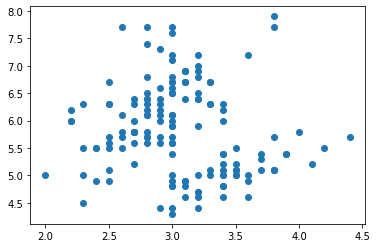

In [150]:
fig = plt.scatter(y=df.sepal_length, x=df.sepal_width)

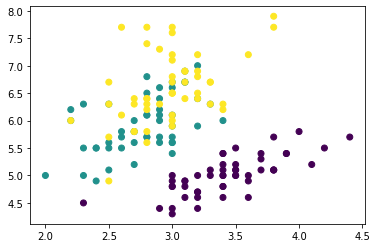

In [151]:
# What if I add some colour?
fig = plt.scatter(y=df.sepal_length, x=df.sepal_width, c=np.array(df.label))

#### Bar charts
For each species, plot a bar chart of the number of flowers with sepals of width more than 3 cm.

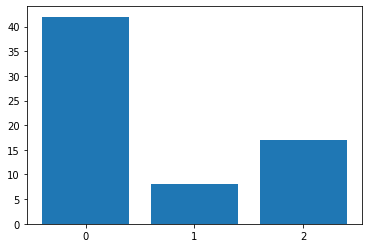

In [154]:
def count_wide_sepals(label):
    return df[(df.sepal_width > 3) & (df.label == label)].shape[0]

# Apply the labels into strings so Python thinks it as a category instead of a number
fig = plt.bar(x=df.label.apply(str), height=df.label.apply(count_wide_sepals))

Looks cool, seems like most of the flowers with sepals wider than 3 cm are Iris setosas!

#### Box plots
Let's find the distribution of the sepal widths of the flowers.

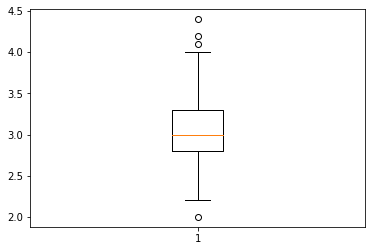

In [155]:
fig = plt.boxplot(x=df.sepal_width)

From the boxplot, we can see that the median of the sepal widths is very close to 3.0 cm and we have some outlier lengths as well :)

#### Histograms
Let's plot the histogram of the petal lengths and see which length interval has the most flowers.

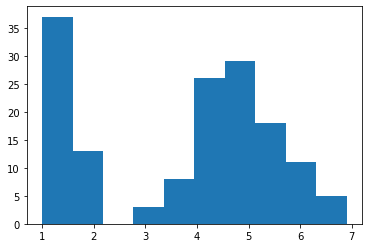

In [159]:
fig = plt.hist(x=df.petal_length)

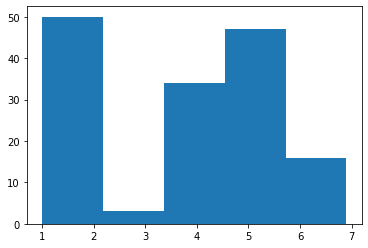

In [160]:
# Fix the number of bins to 5
fig = plt.hist(x=df.petal_length, bins=5)

It looks like we have two separate groups of petal lengths, one ranging from 1-2 cm and one from 3-7 cm. It may be related to the species of the flowers, who knows? (Explore more to find it out by yourself!)

#### Line plots
Lastly, we have the line plot.

In [ ]:
# TODO

---
### Step 4: Wrapping up
You have learned the very basics of data manipulation and data visualization. Pat on the back!
If you are interested to see more from Matplotlib and Pandas, take a look at https://matplotlib.org/ and https://pandas.pydata.org/ directly!

Matplotlib's website also includes a variety of ways to improve and customize your plot, making them look more elegant. For example, adding plot title and legends and even more customized colors. What you saw here are just the basic customizations.

That should be it for today. Hope you enjoyed them and see you again soon!